Math 5750/6880: Mathematics of Data Science \\
Project 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# your code here
def sum_multiples_of_three_or_five(test_list):
    sum=0
    for i in test_list:
        if (i%3==0) or (i%5==0): # remainder 0
            sum+=i
    return sum

list_1=[i for i in range (1,1000)] # 1 to 999
output=sum_multiples_of_three_or_five(list_1)
print("the sum of all the multiples of 3 or 5 below 1000 is:",output )

the sum of all the multiples of 3 or 5 below 1000 is: 233168


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [4]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [5]:
y_df=pd.DataFrame(y)

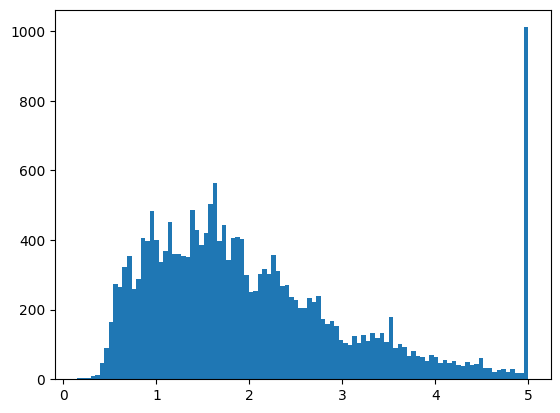

In [6]:
plt.hist(y, bins=100)
plt.show()

In [7]:
number_of_in_bin_approches_5 = sum(1 for x in y_df['MedHouseVal'] if (x <= 5.01) and (x >=4.99))
print(number_of_in_bin_approches_5 )

994


# The histogram of y is slightly right-skewed, with many values close to 5.

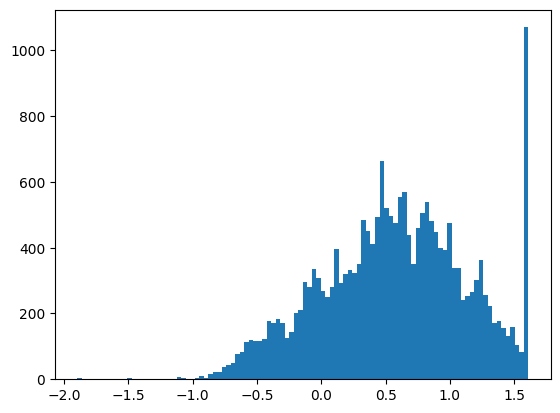

In [8]:
np.log(y)
plt.hist(np.log(y), bins=100)
plt.show()

still a but skewed. But better.

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here